In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Data Reading
train = pd.read_csv('https://raw.githubusercontent.com/RPI-DATA/tutorials-intro/master/rossmann-store-sales/rossmann-store-sales/train.csv', parse_dates = True, low_memory = False, index_col = 'Date')
store = pd.read_csv('https://raw.githubusercontent.com/RPI-DATA/tutorials-intro/master/rossmann-store-sales/rossmann-store-sales/store.csv', low_memory = False)

In [ ]:
print("Train Data Shape:", train.shape)
print("Store Data Shape:", store.shape)

train.head(), store.head()

Train Data Shape: (1017209, 8)
Store Data Shape: (1115, 10)


(            Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
 Date                                                                       
 2015-07-31      1          5   5263        555     1      1            0   
 2015-07-31      2          5   6064        625     1      1            0   
 2015-07-31      3          5   8314        821     1      1            0   
 2015-07-31      4          5  13995       1498     1      1            0   
 2015-07-31      5          5   4822        559     1      1            0   
 
             SchoolHoliday  
 Date                       
 2015-07-31              1  
 2015-07-31              1  
 2015-07-31              1  
 2015-07-31              1  
 2015-07-31              1  ,
    Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
 0      1         c          a               1270.0                        9.0   
 1      2         a          a                570.0                       11.0   
 2      3

In [ ]:
# 1. Reset the index to bring 'Date' back as a column
train = train.reset_index()

# 2. Now merge
data = pd.merge(train, store, how='left', on='Store')

# 3. Check the new data shape and sample
print("Merged Data Shape:", data.shape)
data.head()


Merged Data Shape: (1017209, 18)


,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2015-07-31,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2015-07-31,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,2015-07-31,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,2015-07-31,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,2015-07-31,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# Checking missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])


CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


In [ ]:
# Filling missing values

# Fill CompetitionDistance with maximum distance
data['CompetitionDistance'].fillna(data['CompetitionDistance'].max(), inplace=True)

# Fill CompetitionOpenSinceMonth and CompetitionOpenSinceYear
data['CompetitionOpenSinceMonth'].fillna(1, inplace=True)  # January
data['CompetitionOpenSinceYear'].fillna(1900, inplace=True) # Dummy old year

# Fill Promo2 columns
data['Promo2SinceWeek'].fillna(0, inplace=True)
data['Promo2SinceYear'].fillna(0, inplace=True)
data['PromoInterval'].fillna('None', inplace=True)


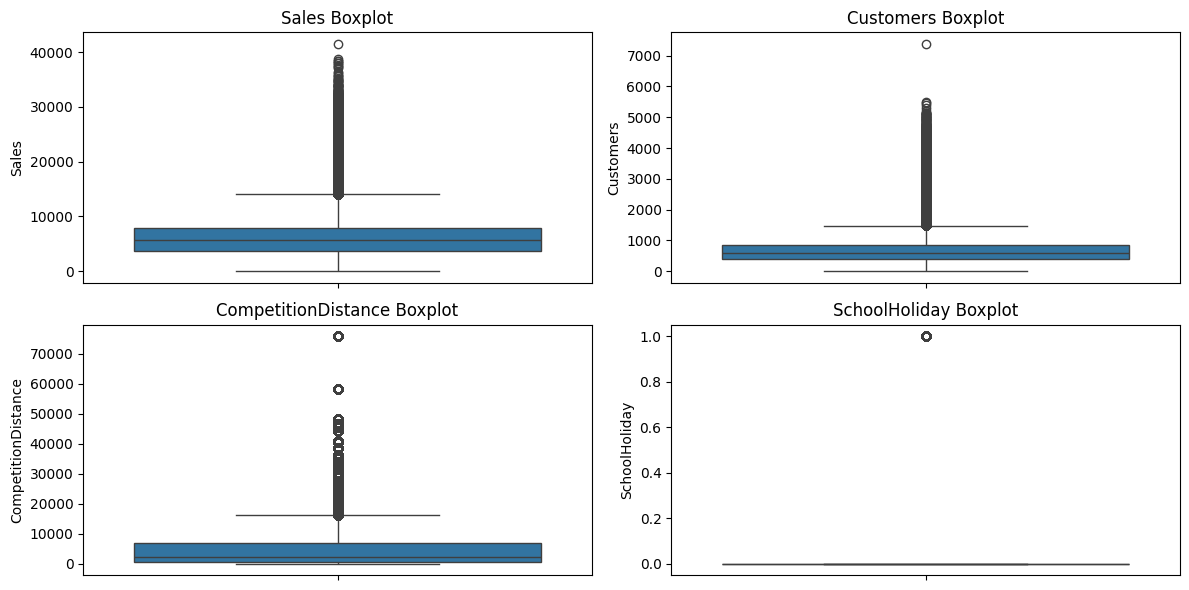

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for columns that might contain outliers (Sales, Customers, CompetitionDistance)
plt.figure(figsize=(12, 6))

# Sales
plt.subplot(2, 2, 1)
sns.boxplot(data['Sales'])
plt.title('Sales Boxplot')

# Customers
plt.subplot(2, 2, 2)
sns.boxplot(data['Customers'])
plt.title('Customers Boxplot')

# CompetitionDistance
plt.subplot(2, 2, 3)
sns.boxplot(data['CompetitionDistance'])
plt.title('CompetitionDistance Boxplot')

# SchoolHoliday (just to check the distribution)
plt.subplot(2, 2, 4)
sns.boxplot(data['SchoolHoliday'])
plt.title('SchoolHoliday Boxplot')

plt.tight_layout()
plt.show()


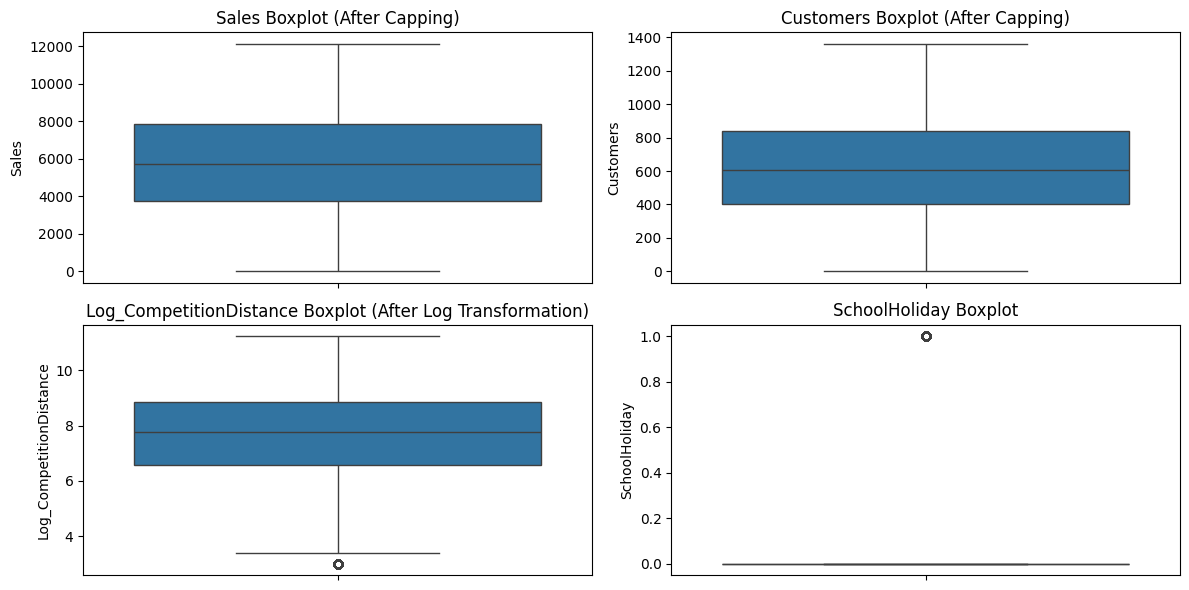

In [ ]:
# Cap outliers for Sales, Customers, and CompetitionDistance at the 95th percentile
sales_cap = data['Sales'].quantile(0.95)
customers_cap = data['Customers'].quantile(0.95)

# Cap values above the 95th percentile for Sales and Customers
data['Sales'] = data['Sales'].clip(upper=sales_cap)
data['Customers'] = data['Customers'].clip(upper=customers_cap)

# Apply log transformation for CompetitionDistance
data['Log_CompetitionDistance'] = np.log(data['CompetitionDistance'])

# Check the distributions again
plt.figure(figsize=(12, 6))

# Sales
plt.subplot(2, 2, 1)
sns.boxplot(data['Sales'])
plt.title('Sales Boxplot (After Capping)')

# Customers
plt.subplot(2, 2, 2)
sns.boxplot(data['Customers'])
plt.title('Customers Boxplot (After Capping)')

# Log_CompetitionDistance
plt.subplot(2, 2, 3)
sns.boxplot(data['Log_CompetitionDistance'])
plt.title('Log_CompetitionDistance Boxplot (After Log Transformation)')

# SchoolHoliday (No change expected)
plt.subplot(2, 2, 4)
sns.boxplot(data['SchoolHoliday'])
plt.title('SchoolHoliday Boxplot')

plt.tight_layout()
plt.show()


In [ ]:
# Convert 'Date' column to datetime if not already
data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['WeekOfYear'] = data['Date'].dt.isocalendar().week

# Create IsWeekend feature (Saturday=5, Sunday=6)
data['IsWeekend'] = data['DayOfWeek'].apply(lambda x: 1 if x in [6, 7] else 0)

# Check the new columns
data[['Date', 'Year', 'Month', 'Day', 'WeekOfYear', 'IsWeekend']].head()

,Date,Year,Month,Day,WeekOfYear,IsWeekend
0,2015-07-31,2015,7,31,31,0
1,2015-07-31,2015,7,31,31,0
2,2015-07-31,2015,7,31,31,0
3,2015-07-31,2015,7,31,31,0
4,2015-07-31,2015,7,31,31,0


In [ ]:
# Extract Year, Month, Day
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Extract WeekOfYear
data['WeekOfYear'] = data['Date'].dt.isocalendar().week

# Create IsWeekend feature (1 if Saturday or Sunday, else 0)
data['IsWeekend'] = data['Date'].dt.weekday.isin([5, 6]).astype(int)


In [ ]:
# Display few rows
data[['Date', 'Year', 'Month', 'Day', 'WeekOfYear', 'IsWeekend']].head()


,Date,Year,Month,Day,WeekOfYear,IsWeekend
0,2015-07-31,2015,7,31,31,0
1,2015-07-31,2015,7,31,31,0
2,2015-07-31,2015,7,31,31,0
3,2015-07-31,2015,7,31,31,0
4,2015-07-31,2015,7,31,31,0


In [ ]:
# 1. IsMonthStart & IsMonthEnd
data['IsMonthStart'] = data['Date'].dt.is_month_start.astype(int)
data['IsMonthEnd'] = data['Date'].dt.is_month_end.astype(int)

# 2. Season
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

data['Season'] = data['Date'].dt.month.apply(get_season)

# 3. IsPromoMonth (check if month is part of PromoInterval)
def is_promo_month(date, promo_interval):
    if pd.isna(promo_interval):
        return 0
    months = promo_interval.split(',')
    return 1 if date.month in [1, 4, 7, 10] else 0  # This is just an example, you can extend it based on actual PromoInterval logic

data['IsPromoMonth'] = data.apply(lambda row: is_promo_month(row['Date'], row['PromoInterval']), axis=1)

# Verify changes
data[['Date', 'IsMonthStart', 'IsMonthEnd', 'Season', 'IsPromoMonth']].head()


,Date,IsMonthStart,IsMonthEnd,Season,IsPromoMonth
0,2015-07-31,0,1,Summer,1
1,2015-07-31,0,1,Summer,1
2,2015-07-31,0,1,Summer,1
3,2015-07-31,0,1,Summer,1
4,2015-07-31,0,1,Summer,1


In [ ]:
# Apply One-Hot Encoding to categorical columns
data = pd.get_dummies(data, columns=['StoreType', 'Assortment', 'StateHoliday', 'Season'], drop_first=True)

# Check the data after encoding
print(data.head())


        Date  Store  DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday  \
0 2015-07-31      1          5   5263        555     1      1              1   
1 2015-07-31      2          5   6064        625     1      1              1   
2 2015-07-31      3          5   8314        821     1      1              1   
3 2015-07-31      4          5  12137       1362     1      1              1   
4 2015-07-31      5          5   4822        559     1      1              1   

   CompetitionDistance  CompetitionOpenSinceMonth  ...  StoreType_c  \
0               1270.0                        9.0  ...         True   
1                570.0                       11.0  ...        False   
2              14130.0                       12.0  ...        False   
3                620.0                        9.0  ...         True   
4              29910.0                        4.0  ...        False   

   StoreType_d  Assortment_b  Assortment_c StateHoliday_a  StateHoliday_b  \
0        False 

In [ ]:
# Drop columns that are not necessary for modeling

# Check the data
print(data.head())


        Date  Store  DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday  \
0 2015-07-31      1          5   5263        555     1      1              1   
1 2015-07-31      2          5   6064        625     1      1              1   
2 2015-07-31      3          5   8314        821     1      1              1   
3 2015-07-31      4          5  12137       1362     1      1              1   
4 2015-07-31      5          5   4822        559     1      1              1   

   CompetitionDistance  CompetitionOpenSinceMonth  ...  StoreType_c  \
0               1270.0                        9.0  ...         True   
1                570.0                       11.0  ...        False   
2              14130.0                       12.0  ...        False   
3                620.0                        9.0  ...         True   
4              29910.0                        4.0  ...        False   

   StoreType_d  Assortment_b  Assortment_c StateHoliday_a  StateHoliday_b  \
0        False 

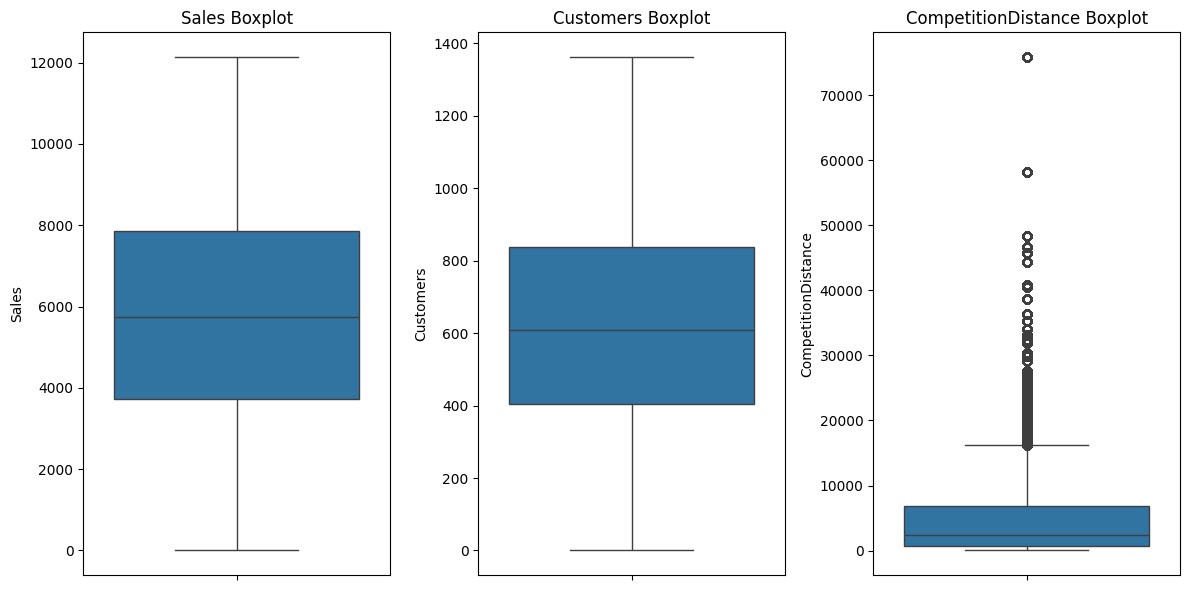

In [ ]:
# Check for outliers using boxplots for numeric columns
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric columns to check for outliers
numeric_columns = ['Sales', 'Customers', 'CompetitionDistance']

# Plot boxplots
plt.figure(figsize=(12, 6))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data[col])
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()


In [ ]:
# Log transformation for CompetitionDistance
data['Log_CompetitionDistance'] = np.log1p(data['CompetitionDistance'])


Text(0.5, 1.0, 'Log_CompetitionDistance Boxplot (After Log Transformation)')

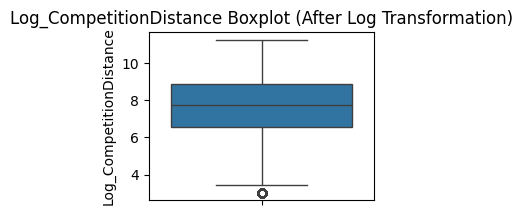

In [ ]:
plt.subplot(2, 2, 3)
sns.boxplot(data['Log_CompetitionDistance'])
plt.title('Log_CompetitionDistance Boxplot (After Log Transformation)')

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'Sales' is the target variable and the rest are features
X = data.drop(columns=['Sales'])  # Features (no need to drop level_0, index, or Date now)
y = data['Sales']  # Target variable

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)

Training data shape: (813767, 34)
Validation data shape: (203442, 34)


In [ ]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Check the resulting encoded feature set
print(X_encoded.head())


        Date  Store  DayOfWeek  Customers  Open  Promo  SchoolHoliday  \
0 2015-07-31      1          5        555     1      1              1   
1 2015-07-31      2          5        625     1      1              1   
2 2015-07-31      3          5        821     1      1              1   
3 2015-07-31      4          5       1362     1      1              1   
4 2015-07-31      5          5        559     1      1              1   

   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0               1270.0                        9.0                    2008.0   
1                570.0                       11.0                    2007.0   
2              14130.0                       12.0                    2006.0   
3                620.0                        9.0                    2009.0   
4              29910.0                        4.0                    2015.0   

   ...  Assortment_c  StateHoliday_a  StateHoliday_b  StateHoliday_c  \
0  ...        

In [ ]:
from sklearn.model_selection import train_test_split

# Split the encoded features again
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("New Training data shape:", X_train.shape)
print("New Validation data shape:", X_val.shape)


New Training data shape: (813767, 36)
New Validation data shape: (203442, 36)


In [ ]:
!pip install xgboost


In [ ]:
# Drop the Date column
X_train = X_train.drop(columns=['Date'])
X_val = X_val.drop(columns=['Date'])


In [ ]:
from xgboost import XGBRegressor

# Create the model
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Fit the model on training data
model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = model.predict(X_val)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 474.6518859863281
Mean Squared Error (MSE): 441005.59375
R-squared (R2): 0.962885320186615


In [ ]:
# Saving the model
import joblib

# Save the trained model to a file
joblib.dump(model, 'xgb_model.pkl')

# Loading the saved model (when you need to use it for predictions)
loaded_model = joblib.load('xgb_model.pkl')


In [ ]:
import pandas as pd
import numpy as np

# Create future dates (e.g., from Jan 1, 2016, to Dec 31, 2016)
future_dates = pd.date_range(start='2016-01-01', end='2016-12-31')

# Prepare the DataFrame with these future dates
future_df = pd.DataFrame({'Date': future_dates})

# Add relevant features (based on your model's requirements)
future_df['DayOfWeek'] = future_df['Date'].dt.dayofweek + 1  # 1=Monday, 7=Sunday
future_df['Store'] = 1  # Assuming Store 1
future_df['Open'] = future_df['DayOfWeek'].apply(lambda x: 0 if x == 7 else 1)  # Closed on Sundays

# Promo based on historical data: 1 for first 15 days, 0 otherwise
future_df['Promo'] = future_df['Date'].dt.day.apply(lambda x: 1 if x <= 15 else 0)

# SchoolHoliday, Promo2, StateHoliday columns assumed zero/False based on historical data
future_df['SchoolHoliday'] = 0
future_df['CompetitionDistance'] = X_train['CompetitionDistance'].mean()
future_df['Promo2'] = 0
future_df['StateHoliday_a'] = False
future_df['StateHoliday_b'] = False
future_df['StateHoliday_c'] = False

# Adding seasonal features (Spring, Summer, Fall, Winter)
future_df['Season_Spring'] = future_df['Date'].dt.month.isin([3, 4, 5])
future_df['Season_Summer'] = future_df['Date'].dt.month.isin([6, 7, 8])
future_df['Season_Fall'] = future_df['Date'].dt.month.isin([9, 10, 11])
future_df['Season_Winter'] = future_df['Date'].dt.month.isin([12, 1, 2])

# Ensure the future dataframe has the same features as your training data
print(future_df.head())

# Identify the columns present in X_train but not in future_df (missing columns)
missing_cols = set(X_train.columns) - set(future_df.columns)

# Identify the columns in future_df but not in X_train (extra columns)
extra_cols = set(future_df.columns) - set(X_train.columns)

# Create a copy of future_df to work with
future_features = future_df.copy()

# Add missing columns with default values (e.g., 0 or np.nan)
for col in missing_cols:
    future_features[col] = 0  # You can use np.nan if more appropriate

# Remove extra columns that are not in X_train
future_features = future_features.drop(columns=extra_cols)

# Ensure the column order matches X_train's order
future_features = future_features[X_train.columns]

# Now, future_features should have the same columns and order as X_train
print(future_features.head())

# Make predictions using your trained model (loaded_model)
future_predictions = loaded_model.predict(future_features)

# Print the predictions
print(future_predictions)


        Date  DayOfWeek  Store  Open  Promo  SchoolHoliday  \
0 2016-01-01          5      1     1      1              0   
1 2016-01-02          6      1     1      1              0   
2 2016-01-03          7      1     0      1              0   
3 2016-01-04          1      1     1      1              0   
4 2016-01-05          2      1     1      1              0   

   CompetitionDistance  Promo2  StateHoliday_a  StateHoliday_b  \
0          5608.727719       0           False           False   
1          5608.727719       0           False           False   
2          5608.727719       0           False           False   
3          5608.727719       0           False           False   
4          5608.727719       0           False           False   

   StateHoliday_c  Season_Spring  Season_Summer  Season_Fall  Season_Winter  
0           False          False          False        False           True  
1           False          False          False        False           Tru

In [ ]:
# # Identify the columns present in X_train but not in future_features (missing columns)
# missing_cols = set(X_train.columns) - set(future_features.columns)

# # Identify the columns in future_features but not in X_train (extra columns)
# extra_cols = set(future_features.columns) - set(X_train.columns)


In [ ]:
# import numpy as np

# # Add missing columns with a default value (e.g., 0 or np.nan)
# for col in missing_cols:
#     future_features[col] = 0  # You can use np.nan or another appropriate value


In [ ]:
# # Remove extra columns that are not in X_train
# future_df = future_features.drop(columns=extra_cols)


In [ ]:
# # Predict using the trained model
# future_predictions = loaded_model.predict(future_features)
# print(future_predictions)


In [ ]:
# print(future_predictions.shape)


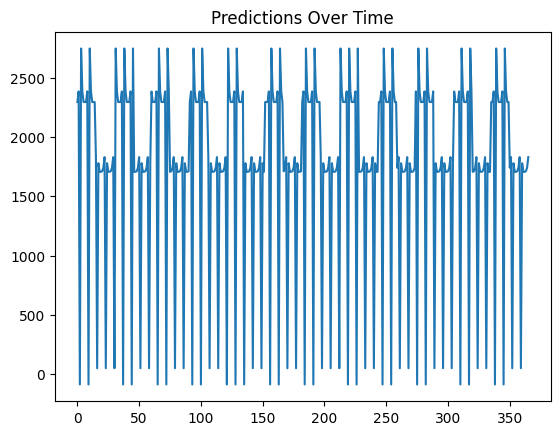

In [ ]:
import matplotlib.pyplot as plt
plt.plot(future_predictions)
plt.title("Predictions Over Time")
plt.show()


In [ ]:
column_names = list(X_train.columns)
print(column_names)



['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'Log_CompetitionDistance', 'Year', 'Month', 'Day', 'WeekOfYear', 'IsWeekend', 'IsMonthStart', 'IsMonthEnd', 'IsPromoMonth', 'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec', 'PromoInterval_None']


In [ ]:
future_df['PredictedSales'] = future_predictions


In [ ]:
print(future_df.columns)
print(data.columns)
print(future_df.head())
print(data.head())


Index(['Date', 'DayOfWeek', 'Store', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'Promo2', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'Season_Spring', 'Season_Summer', 'Season_Fall',
       'Season_Winter', 'PredictedSales'],
      dtype='object')
Index(['Date', 'Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Log_CompetitionDistance', 'Year',
       'Month', 'Day', 'WeekOfYear', 'IsWeekend', 'IsMonthStart', 'IsMonthEnd',
       'IsPromoMonth', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_b', 'Assortment_c', 'StateHoliday_a', 'StateHoliday_b',
       'StateHoliday_c', 'Season_Spring', 'Season_Summer', 'Season_Winter'],
      dtype='object')
        Date  DayOfWeek  Store  Open  Promo  SchoolHoliday  \
0 2016-01-01          5      1     1

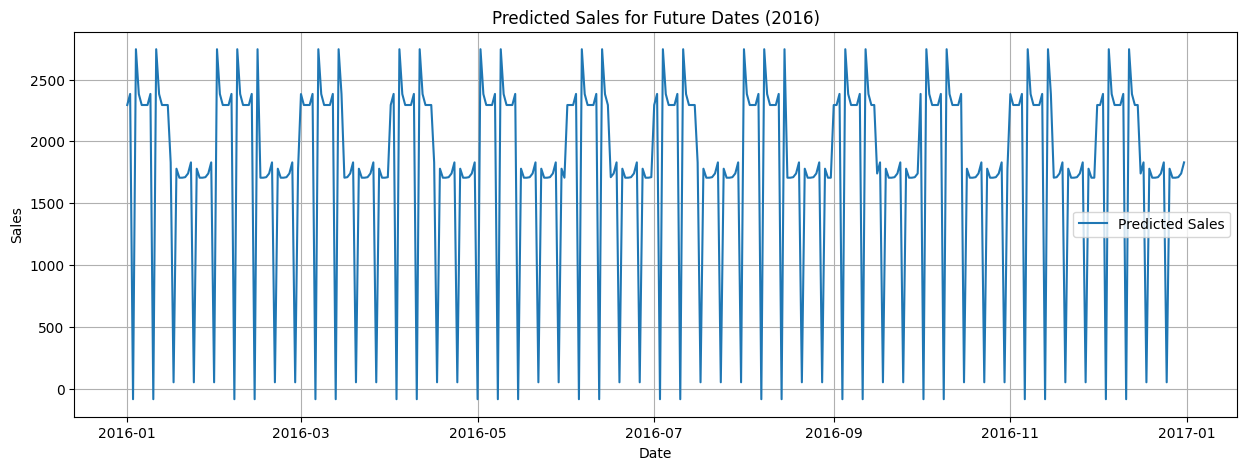

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(future_df['Date'], future_df['PredictedSales'], label='Predicted Sales')
plt.title('Predicted Sales for Future Dates (2016)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
pip install shap


In [ ]:
print(X_train.dtypes)


Store                               int64
DayOfWeek                           int64
Customers                           int64
Open                                int64
Promo                               int64
SchoolHoliday                       int64
CompetitionDistance               float64
CompetitionOpenSinceMonth         float64
CompetitionOpenSinceYear          float64
Promo2                              int64
Promo2SinceWeek                   float64
Promo2SinceYear                   float64
Log_CompetitionDistance           float64
Year                                int32
Month                               int32
Day                                 int32
WeekOfYear                         UInt32
IsWeekend                           int64
IsMonthStart                        int64
IsMonthEnd                          int64
IsPromoMonth                        int64
StoreType_b                          bool
StoreType_c                          bool
StoreType_d                       

In [ ]:
# Convert all boolean columns to integers (0 or 1)
X_train = X_train.astype({col: 'int' for col in X_train.select_dtypes('bool').columns})

# Verify the conversion
print(X_train.dtypes)


Store                               int64
DayOfWeek                           int64
Customers                           int64
Open                                int64
Promo                               int64
SchoolHoliday                       int64
CompetitionDistance               float64
CompetitionOpenSinceMonth         float64
CompetitionOpenSinceYear          float64
Promo2                              int64
Promo2SinceWeek                   float64
Promo2SinceYear                   float64
Log_CompetitionDistance           float64
Year                                int32
Month                               int32
Day                                 int32
WeekOfYear                         UInt32
IsWeekend                           int64
IsMonthStart                        int64
IsMonthEnd                          int64
IsPromoMonth                        int64
StoreType_b                         int64
StoreType_c                         int64
StoreType_d                       

In [ ]:
X_train = X_train.astype(np.float64)


In [ ]:
import shap
explainer = shap.Explainer(loaded_model, X_train)

# # Compute SHAP values for your training data
# shap_values = explainer(X_train)

# # Visualize the SHAP summary plot to understand the feature importance
# shap.summary_plot(shap_values, X_train)
# Use a subset of the data for faster computation
X_train_subset = X_train.head(1000)  # Take the first 1000 rows or any other sample size
shap_values = explainer(X_train_subset)


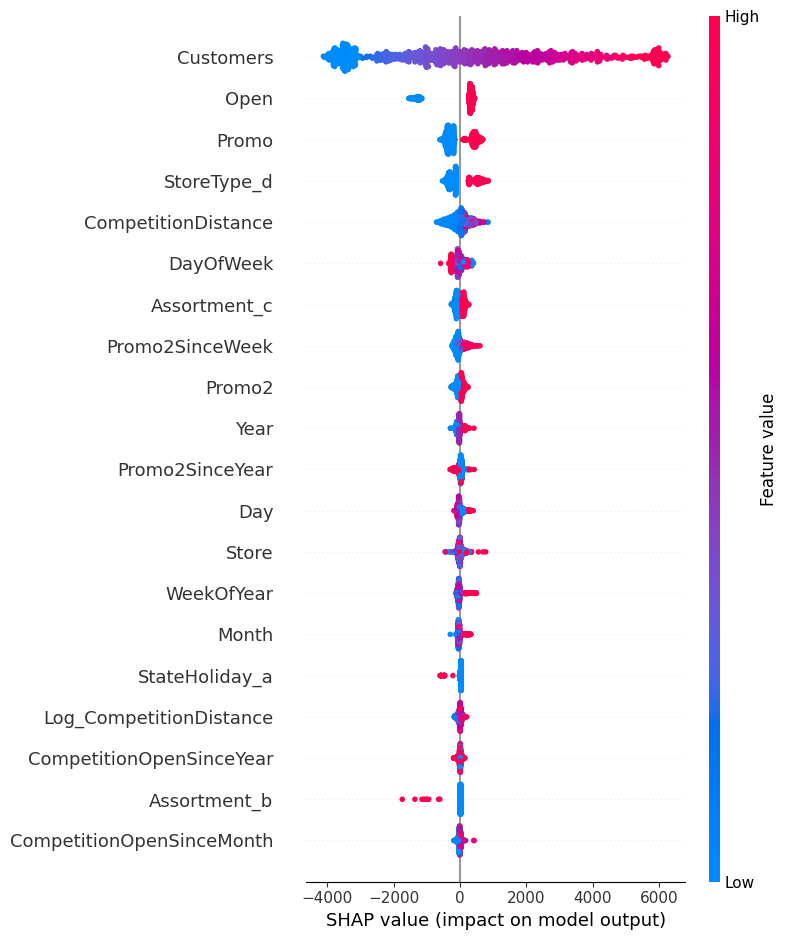

In [ ]:
shap.summary_plot(shap_values, X_train_subset)


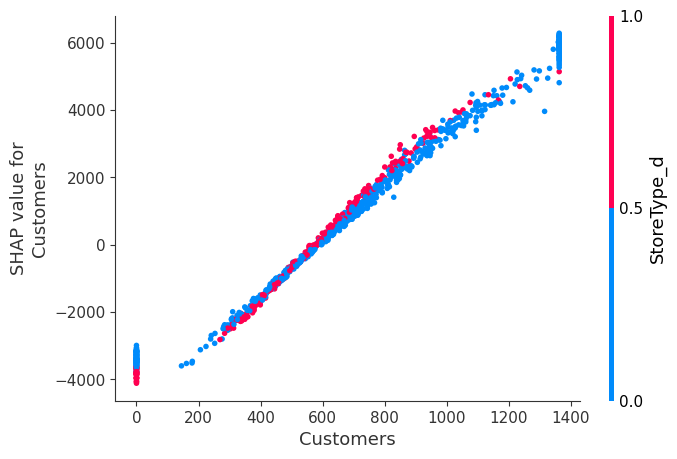

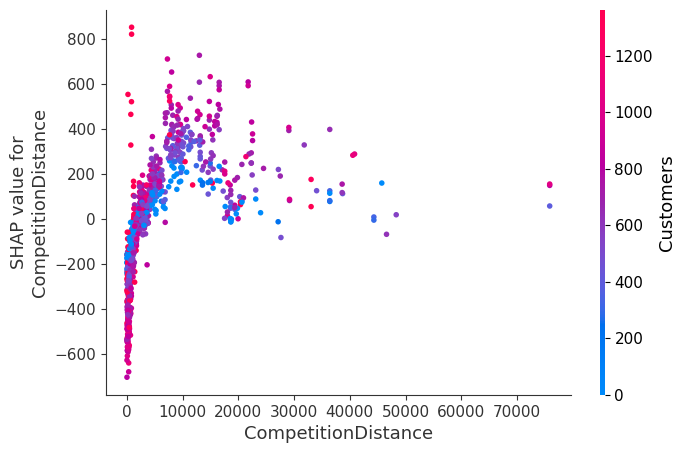

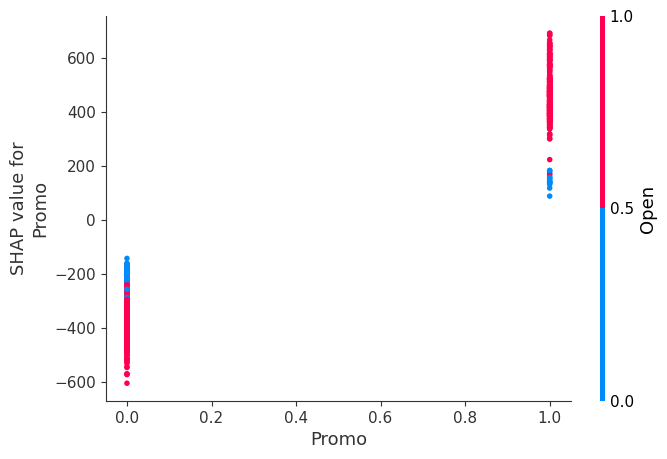

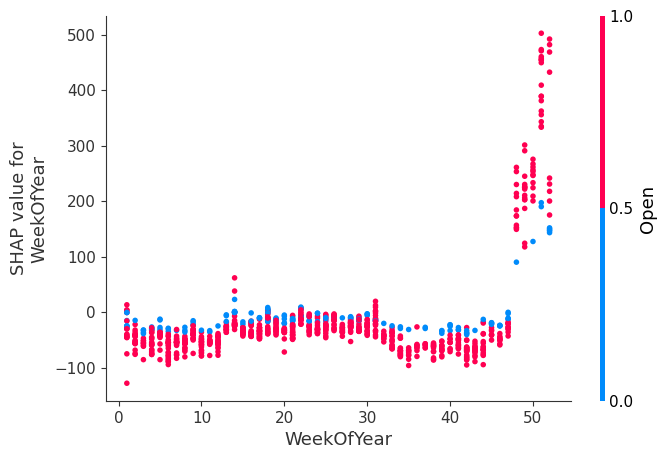

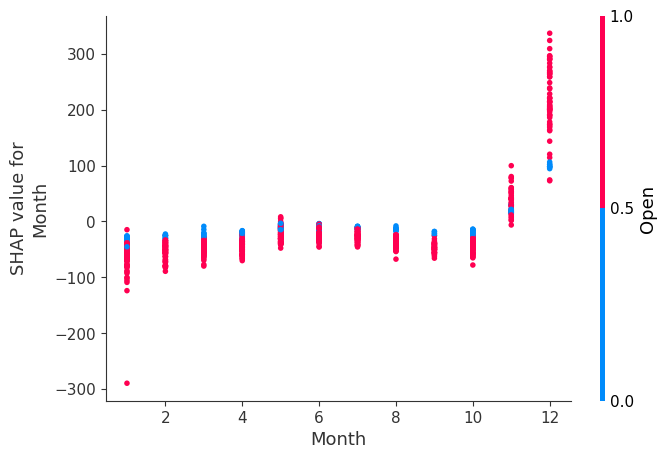

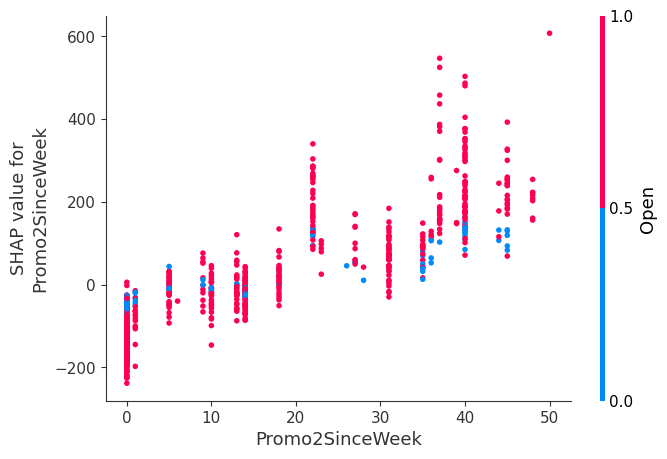

In [ ]:
shap.dependence_plot('Customers', shap_values.values, X_train_subset)
shap.dependence_plot('CompetitionDistance', shap_values.values, X_train_subset)
shap.dependence_plot('Promo', shap_values.values, X_train_subset)
shap.dependence_plot('WeekOfYear', shap_values.values, X_train_subset)
shap.dependence_plot('Month', shap_values.values, X_train_subset)
shap.dependence_plot('Promo2SinceWeek', shap_values.values, X_train_subset)

